In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
np.random.seed(0)

centers=[[1,1],[0,0],[2,-1]]
n_cluster = len(centers)

data,labels_true=make_blobs(n_samples=2000,
                           centers=centers,cluster_std=0.7)

In [5]:
print(data)
print()
print(labels_true)
print(np.unique(labels_true))

[[ 2.88735684  0.94825273]
 [ 0.00712986  1.53880744]
 [ 0.3264657  -0.06607475]
 ...
 [ 0.53901292  0.64003622]
 [ 1.65065358  1.40755721]
 [ 0.74131908 -0.71579507]]

[0 1 1 ... 0 0 1]
[0 1 2]


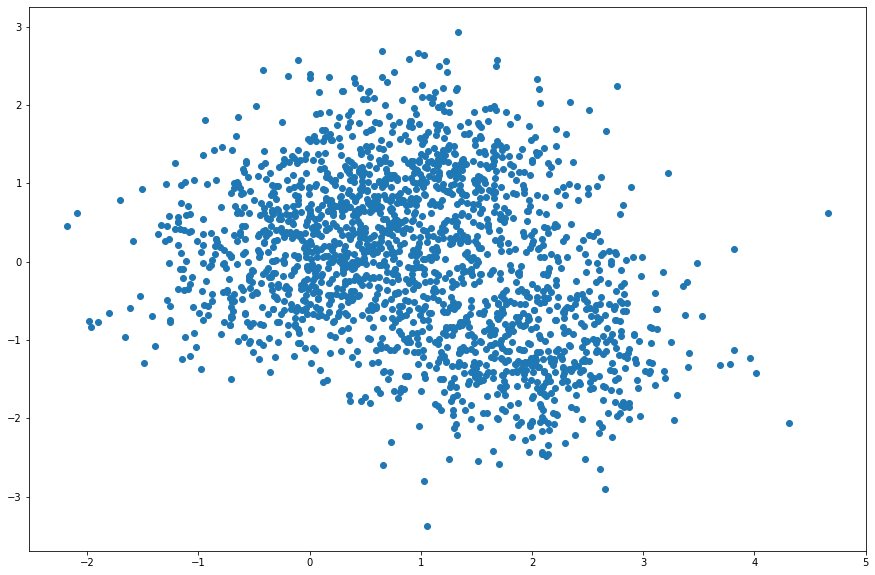

In [6]:
plt.figure(figsize=(15,10))
plt.scatter(data[:,0],data[:,1])

In [7]:
estimator=KMeans(init='k-means++',n_clusters=3,n_init=10)
estimator.fit(data)

KMeans(n_clusters=3)

In [12]:
labels_predict=estimator.labels_
np.unique(labels_predict)

array([0, 1, 2])

In [17]:
cm=plt.cm.get_cmap('jet')
scaled_labels=(labels_predict-np.min(labels_predict))
scaled_labels=scaled_labels/(np.max(labels_predict)-np.min(labels_predict))
np.unique(scaled_labels)

array([0. , 0.5, 1. ])

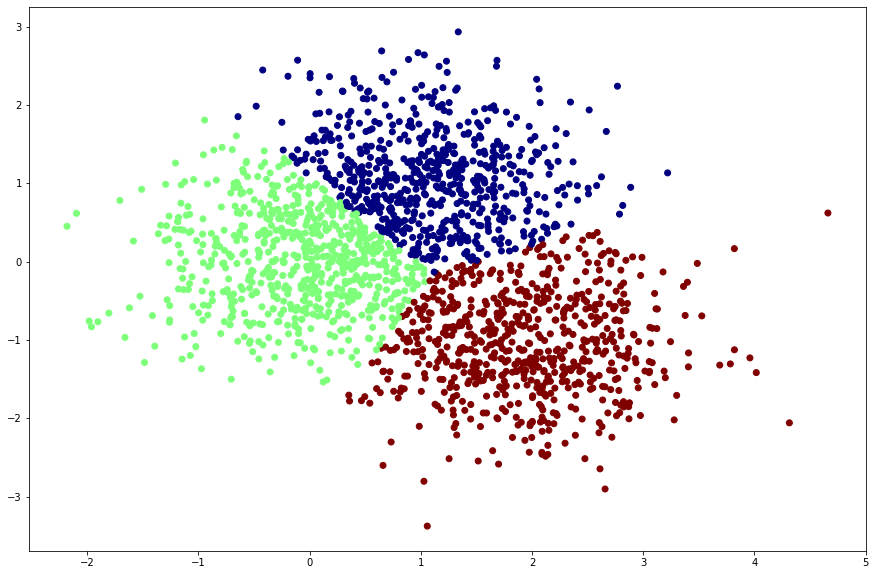

In [22]:
plt.figure(figsize=(15,10))
plt.scatter(data[:,0],data[:,1],c=cm(scaled_labels))

In [23]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
import pandas as pd

np.random.seed(60)

In [25]:
digits=load_digits()
data=digits.data
print('<Before scaling>')
print(data)
print('<After scaling>')
data=scale(data)
print(data)

<Before scaling>
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
<After scaling>
[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


In [28]:
labels_true = digits.target
n_samples,n_features = data.shape
clusters = np.unique(labels_true)
n_clusters = len(clusters)

In [30]:
print("n_samples : " ,\+ str(n_samples))
print("n_features : " + str(n_features))
print("n_clusters : " + str(n_clusters))
print("clusters : " + str(clusters))

n_samples :  1797
n_features : 64
n_clusters : 10
clusters : [0 1 2 3 4 5 6 7 8 9]


In [35]:
estimator1=KMeans(init='k-means++',n_clusters = n_clusters,n_init = 10)
estimator1.fit(data)

estimator2 = KMeans(init = 'random',n_clusters = n_clusters,n_init=10)
estimator2.fit(data)

labels_predict1 = estimator1.labels_
labels_predict2 = estimator2.labels_

In [36]:
from sklearn import metrics

print("< clustering performance evaluation >\n")
print("1. clustering with initializing first centroids of clusters with k-means++ function ")
print('homogenity score : %.3f' 
      %(metrics.homogeneity_score(labels_true, labels_predict1)))
print('completeness score : %.3f' 
      %(metrics.completeness_score(labels_true, labels_predict1)))
print('v-measure score : %.3f \n'
     %(metrics.v_measure_score(labels_true, labels_predict1)))
print("2. clustering with initializing first centroids of clusters randomly ")
print('homogenity score : %.3f' 
      %(metrics.homogeneity_score(labels_true, labels_predict2)))
print('completeness score : %.3f' 
      %(metrics.completeness_score(labels_true, labels_predict2)))
print('v-measure score : %.3f \n'
     %(metrics.v_measure_score(labels_true, labels_predict2)))

< clustering performance evaluation >

1. clustering with initializing first centroids of clusters with k-means++ function 
homogenity score : 0.652
completeness score : 0.696
v-measure score : 0.674 

2. clustering with initializing first centroids of clusters randomly 
homogenity score : 0.599
completeness score : 0.647
v-measure score : 0.622 

